<a href="https://colab.research.google.com/github/Coding-4A11j/-Analyzing-Restaurant-Trends-Insights-into-Cuisines-Ratings-and-Service-O/blob/main/Restaurant_Analytics_Understanding_Price_Ranges%2C_Customer_Votes%2C_and_Service_Availability%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd


In [7]:
df = pd.read_csv("/content/Dataset  (1).csv")

In [8]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [9]:
cuisine_counts = df['Cuisines'].dropna().str.split(', ').explode().value_counts()

# Get the top 3 most common cuisines
top_3_cuisines = cuisine_counts.head(3)

# Calculate the percentage of restaurants serving each top cuisine
total_restaurants = len(df)
cuisine_percentages = (top_3_cuisines / total_restaurants) * 100

print(top_3_cuisines)
print(cuisine_percentages)

Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Name: count, dtype: int64
Cuisines
North Indian    41.461627
Chinese         28.635745
Fast Food       20.793634
Name: count, dtype: float64


In [10]:
city_counts = df['City'].value_counts()
top_city_by_count = city_counts.idxmax()

# 2. Calculate the average rating for restaurants in each city
city_avg_rating = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)

# 3. Get the city with the highest average rating
top_city_by_rating = city_avg_rating.idxmax()

print(f"City with the highest number of restaurants: {top_city_by_count}")
print(f"\nAverage rating for each city:\n{city_avg_rating}")
print(f"\nCity with the highest average rating: {top_city_by_rating}")

City with the highest number of restaurants: New Delhi

Average rating for each city:
City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
                      ...   
New Delhi           2.438845
Montville           2.400000
Mc Millan           2.400000
Noida               2.036204
Faridabad           1.866932
Name: Aggregate rating, Length: 141, dtype: float64

City with the highest average rating: Inner City


In [11]:
import matplotlib.pyplot as plt

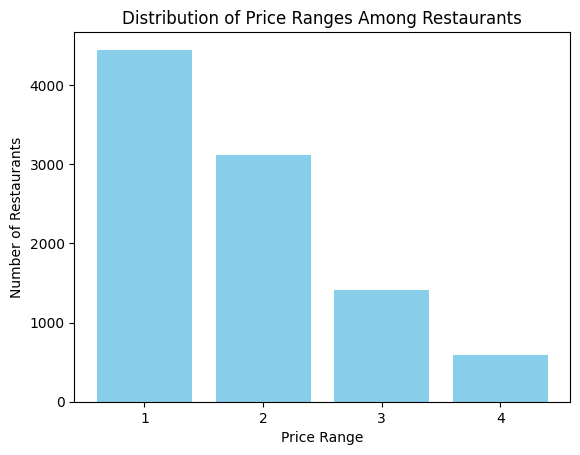

Percentage of restaurants in each price range:
 Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: count, dtype: float64


In [12]:
price_counts = df['Price range'].value_counts().sort_index()

# Plot the bar chart
plt.bar(price_counts.index, price_counts.values, color='skyblue')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Price Ranges Among Restaurants')
plt.xticks(price_counts.index)
plt.show()

# 2. Calculate the percentage of restaurants in each price range
price_percentages = (price_counts / len(df)) * 100
print("Percentage of restaurants in each price range:\n", price_percentages)



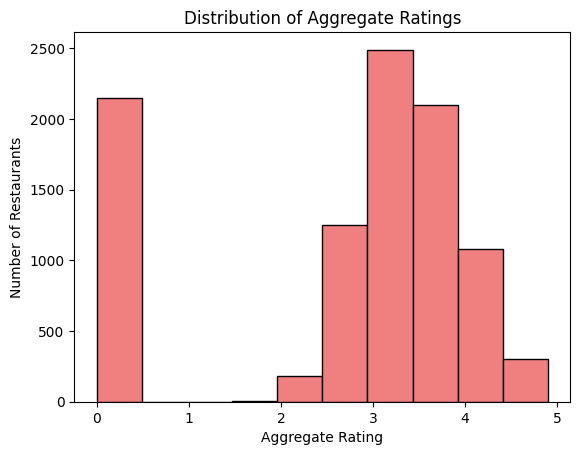

The most common rating is: 0.0

The average number of votes received by restaurants is: 156.91


In [13]:
plt.hist(df['Aggregate rating'], bins=10, color='lightcoral', edgecolor='black')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Aggregate Ratings')
plt.show()

# Determine the most common rating range
most_common_rating_range = df['Aggregate rating'].mode()[0]
print(f"The most common rating is: {most_common_rating_range}")

# 2. Calculate the average number of votes received by restaurants
average_votes = df['Votes'].mean()
print(f"\nThe average number of votes received by restaurants is: {average_votes:.2f}")



In [14]:
common_cuisine_combinations = df['Cuisines'].value_counts().head(5)
print("Most common cuisine combinations:\n", common_cuisine_combinations)

# 2. Check if certain cuisine combinations tend to have higher ratings
cuisine_rating = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
top_cuisine_combinations = cuisine_rating.head(5)
print("\nCuisine combinations with the highest average ratings:\n", top_cuisine_combinations)


Most common cuisine combinations:
 Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Fast Food                354
North Indian, Mughlai    334
Name: count, dtype: int64

Cuisine combinations with the highest average ratings:
 Cuisines
Burger, Bar Food, Steak            4.9
American, Burger, Grill            4.9
American, Caribbean, Seafood       4.9
American, Coffee and Tea           4.9
Mexican, American, Healthy Food    4.9
Name: Aggregate rating, dtype: float64


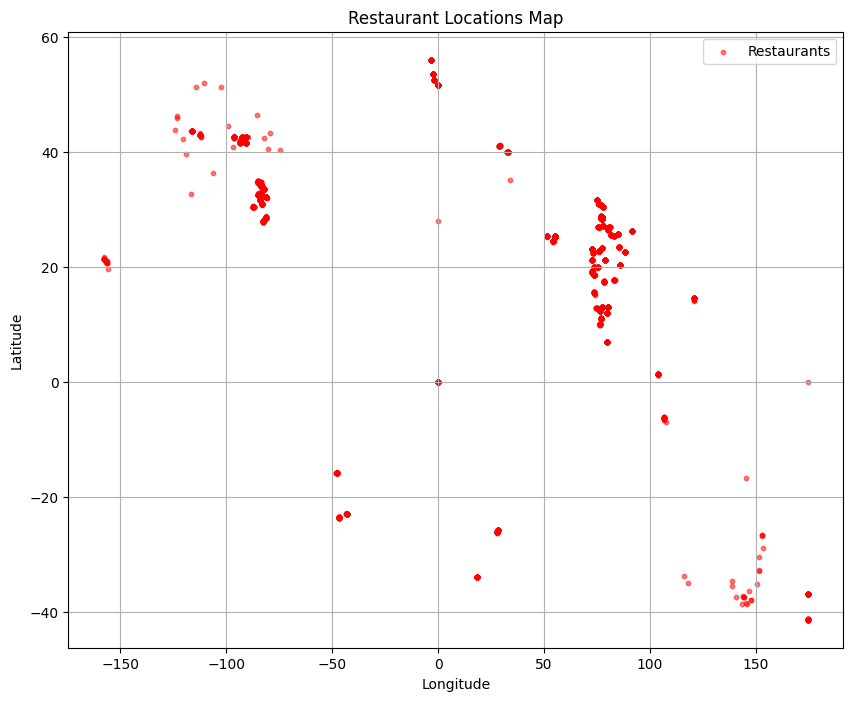

In [15]:
plt.figure(figsize=(10, 8))
plt.scatter(df['Longitude'], df['Latitude'], c='red', alpha=0.5, s=10, label='Restaurants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Restaurant Locations Map')
plt.legend()
plt.grid(True)
plt.show()

# 2. Identify any patterns or clusters
# Basic visual inspection will show clustering in certain areas.

In [16]:
chain_counts = df['Restaurant Name'].value_counts()
restaurant_chains = chain_counts[chain_counts > 1].head(10)
print("Top restaurant chains:\n", restaurant_chains)

# 2. Analyze the ratings and popularity of different restaurant chains
chain_analysis = df[df['Restaurant Name'].isin(restaurant_chains.index)].groupby('Restaurant Name').agg(
    avg_rating=('Aggregate rating', 'mean'),
    total_votes=('Votes', 'sum'),
    number_of_branches=('Restaurant Name', 'count')
).sort_values(by='avg_rating', ascending=False)

print("\nRatings and popularity of top restaurant chains:\n", chain_analysis)

Top restaurant chains:
 Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Keventers           34
Pizza Hut           30
Giani               29
Baskin Robbins      28
Barbeque Nation     26
Name: count, dtype: int64

Ratings and popularity of top restaurant chains:
                   avg_rating  total_votes  number_of_branches
Restaurant Name                                              
Barbeque Nation     4.353846        28142                  26
McDonald's          3.339583         5291                  48
Pizza Hut           3.320000         4961                  30
Subway              2.907937         6124                  63
Keventers           2.870588         1263                  34
Domino's Pizza      2.740506         6643                  79
Giani               2.689655          854                  29
Green Chick Chop    2.672549          964                  51
Cafe Coffee Day     2.419277     

In [17]:
import re
from collections import Counter

In [18]:
if 'Reviews' in df.columns:
    # 1. Analyze the text reviews to find common positive and negative keywords
    all_reviews = ' '.join(df['Reviews'].dropna().astype(str)).lower()

    # Basic positive and negative word lists
    positive_words = ['good', 'great', 'excellent', 'amazing', 'awesome', 'nice', 'delicious', 'perfect', 'best', 'love']
    negative_words = ['bad', 'poor', 'worst', 'disappointing', 'awful', 'terrible', 'horrible', 'bland', 'overpriced', 'rude']

    # Count positive and negative words in reviews
    positive_count = Counter(word for word in re.findall(r'\w+', all_reviews) if word in positive_words)
    negative_count = Counter(word for word in re.findall(r'\w+', all_reviews) if word in negative_words)

    print("Most common positive keywords:\n", positive_count.most_common(5))
    print("\nMost common negative keywords:\n", negative_count.most_common(5))

    # 2. Calculate the average length of reviews
    review_lengths = df['Reviews'].dropna().apply(lambda x: len(x.split()))
    avg_review_length = review_lengths.mean()
    print(f"\nAverage length of reviews: {avg_review_length:.2f} words")

    # 3. Explore the relationship between review length and rating
    df['Review Length'] = df['Reviews'].dropna().apply(lambda x: len(x.split()))
    length_rating_corr = df[['Review Length', 'Aggregate rating']].corr().iloc[0, 1]
    print(f"\nCorrelation between review length and rating: {length_rating_corr:.2f}")
else:
    print("No 'Reviews' column found in the dataset. Please check the column name.")

No 'Reviews' column found in the dataset. Please check the column name.


In [19]:
top_voted_restaurant = df.loc[df['Votes'].idxmax(), ['Restaurant Name', 'Votes', 'Aggregate rating']]
lowest_voted_restaurant = df.loc[df['Votes'].idxmin(), ['Restaurant Name', 'Votes', 'Aggregate rating']]

print("Restaurant with the highest votes:\n", top_voted_restaurant)
print("\nRestaurant with the lowest votes:\n", lowest_voted_restaurant)

# 2. Analyze the correlation between the number of votes and the rating
votes_rating_corr = df[['Votes', 'Aggregate rating']].corr().iloc[0, 1]
print(f"\nCorrelation between number of votes and rating: {votes_rating_corr:.2f}")

Restaurant with the highest votes:
 Restaurant Name      Toit
Votes               10934
Aggregate rating      4.8
Name: 728, dtype: object

Restaurant with the lowest votes:
 Restaurant Name     Cantinho da Gula
Votes                              0
Aggregate rating                 0.0
Name: 69, dtype: object

Correlation between number of votes and rating: 0.31


In [20]:
delivery_analysis = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack().fillna(0) * 100

# 2. Analyze the relationship between price range and table booking
booking_analysis = df.groupby('Price range')['Has Table booking'].value_counts(normalize=True).unstack().fillna(0) * 100

print("Percentage of restaurants offering online delivery by price range:\n", delivery_analysis)
print("\nPercentage of restaurants offering table booking by price range:\n", booking_analysis)

# 3. Check if higher-priced restaurants are more likely to offer these services
avg_delivery_by_price = df.groupby('Price range')['Has Online delivery'].apply(lambda x: (x == 'Yes').mean() * 100)
avg_booking_by_price = df.groupby('Price range')['Has Table booking'].apply(lambda x: (x == 'Yes').mean() * 100)

print("\nLikelihood of online delivery by price range:\n", avg_delivery_by_price)
print("\nLikelihood of table booking by price range:\n", avg_booking_by_price)

Percentage of restaurants offering online delivery by price range:
 Has Online delivery         No        Yes
Price range                              
1                    84.225923  15.774077
2                    58.689367  41.310633
3                    70.809659  29.190341
4                    90.955631   9.044369

Percentage of restaurants offering table booking by price range:
 Has Table booking         No        Yes
Price range                            
1                  99.977498   0.022502
2                  92.322518   7.677482
3                  54.261364  45.738636
4                  53.242321  46.757679

Likelihood of online delivery by price range:
 Price range
1    15.774077
2    41.310633
3    29.190341
4     9.044369
Name: Has Online delivery, dtype: float64

Likelihood of table booking by price range:
 Price range
1     0.022502
2     7.677482
3    45.738636
4    46.757679
Name: Has Table booking, dtype: float64
